By Aman Dubal

# Loading Dataset

In [18]:
import pandas as pd

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

# Inspect the first few rows of the dataset
titanic_data.head()

# Summary statistics and data types
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Cleaning Dataset

In [19]:
# Checking for missing values
titanic_data.isnull().sum()

# Fill missing age values with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing embarked values with the most frequent port
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Dropping the Cabin column since it has too many missing values
titanic_data.drop(columns=['Cabin'], inplace=True)


<ipython-input-19-1919378d2c35>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
<ipython-input-19-1919378d2c35>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

# Exploratory Data Analysis (EDA)

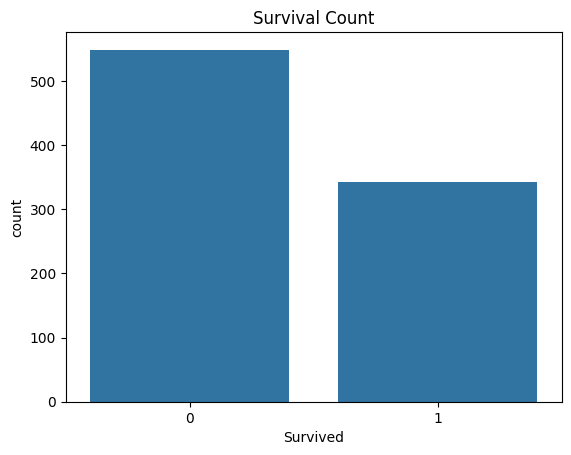

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the survival rate
sns.countplot(data=titanic_data, x='Survived')
plt.title('Survival Count')
plt.show()

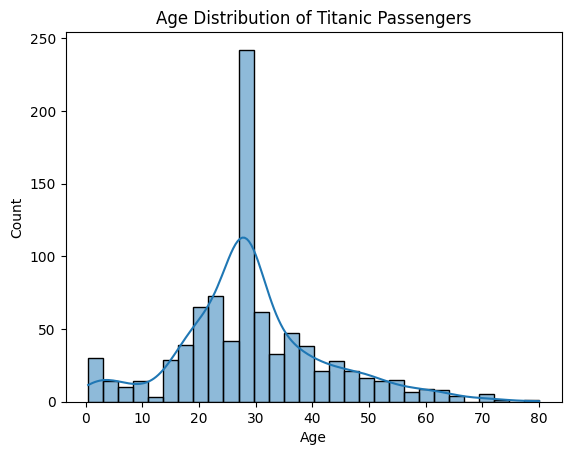

In [21]:
# Age distribution
sns.histplot(titanic_data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.show()


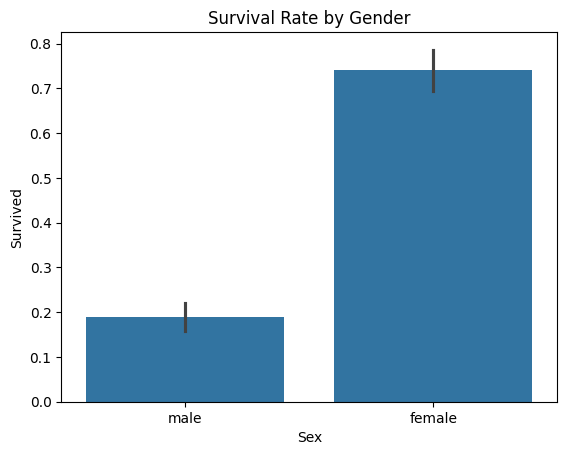

In [22]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.show()

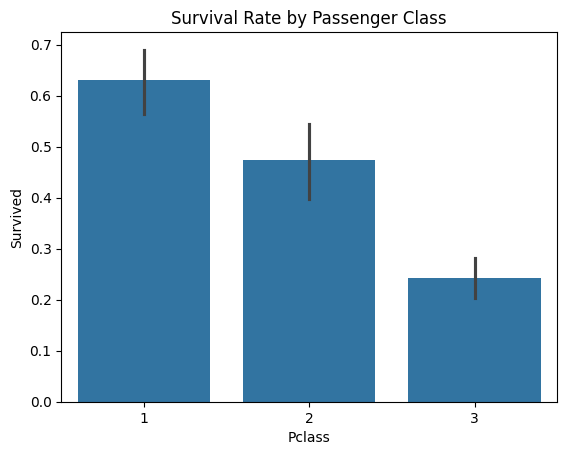

In [24]:
# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

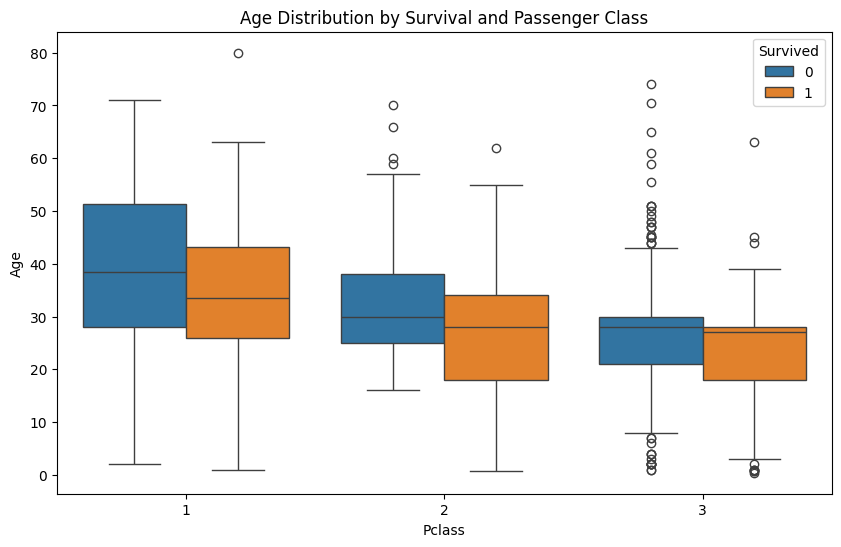

In [25]:
# Age distribution by survival and passenger class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=titanic_data)
plt.title('Age Distribution by Survival and Passenger Class')
plt.show()